In [ ]:
"""
#Program developed by Raul Ramirez Summer 2019
#Monterrey NL rramirez@tec.mx
#based in multiple sources
"""

In [3]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sn

from sklearn import tree

In [6]:
# Load datasets from URL
# Get the URL that contains the dataset
urlDataCandidates = 'https://raw.githubusercontent.com/ErenJulianUsta/Data-Science-and-Big-Data-Analytics/main/candidates.csv'
urlZipData = 'https://raw.githubusercontent.com/ErenJulianUsta/Data-Science-and-Big-Data-Analytics/main/ZipDataNEW.csv'
# Read the URL to load datasets
candidates = pd.read_csv(urlDataCandidates)
zipData = pd.read_csv(urlZipData)

In [5]:
#Read data
#candidates = pd.read_csv('candidates.csv')
candidates.head(10)

,gmat,gpa,work_experience,admitted
0,708,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,1
3,710,3.7,5,1
4,680,3.9,4,1
5,730,3.7,6,1
6,690,2.3,1,0
7,720,3.3,4,1
8,740,3.3,5,1
9,690,1.7,1,0


In [7]:
zipData.head(10)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Si
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Si
5,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,No
6,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,No
7,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,Si
8,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,No
9,132,0.00,5.80,30.96,Present,69,30.11,0.00,53,Si


In [8]:
# Finding correlated Variables
zipData.corr()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
sbp,1.000000,0.212247,0.158296,0.356500,-0.057454,0.238067,0.140096,0.388771
tobacco,0.212247,1.000000,0.158905,0.286640,-0.014608,0.124529,0.200813,0.450330
ldl,0.158296,0.158905,1.000000,0.440432,0.044048,0.330506,-0.033403,0.311799
adiposity,0.356500,0.286640,0.440432,1.000000,-0.043144,0.716556,0.100330,0.625954
typea,-0.057454,-0.014608,0.044048,-0.043144,1.000000,0.074006,0.039498,-0.102606
obesity,0.238067,0.124529,0.330506,0.716556,0.074006,1.000000,0.051620,0.291777
alcohol,0.140096,0.200813,-0.033403,0.100330,0.039498,0.051620,1.000000,0.101125
age,0.388771,0.450330,0.311799,0.625954,-0.102606,0.291777,0.101125,1.000000


In [ ]:
#Separate dependent and independent variables
X = candidates[['gmat', 'gpa','work_experience']]
y = candidates['admitted']

In [ ]:
#Separate train and test data 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

#Standarize data. Subtract mean and devide by standard deviation
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Fit classifier with train data
rf = RandomForestClassifier(n_estimators=20, random_state=0, max_depth = 3)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
#Predict test data
y_pred=rf.predict(X_test)
print(y_pred)

[0 0 1 1 0 0 1 1]


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
#Get right and wrong classifications
cm = confusion_matrix(y_test,y_pred)
print(cm)
tn, fp, fn, tp = cm.ravel()

[[4 0]
 [0 4]]


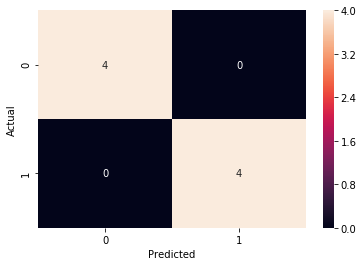

In [ ]:
#Pretty print confusion matrix
cm2 = pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(cm2,annot=True)

In [ ]:
tn, fp, fn, tp

(4, 0, 0, 4)

In [ ]:
#Get performance measures
from sklearn.metrics import classification_report

In [ ]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [ ]:
recall=tp/(tp+fn)
print("Likelihood Ratio",recall/(1-recall))

Likelihood Ratio inf


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


In [ ]:
print("Accuracy=",(tp+tn)/(tp+tn+fp+fn))

Accuracy= 1.0


In [ ]:
import graphviz 
import pydot
#Now create one single Decision Tree to print
#visualize with http://webgraphviz.com/
dtc = tree.DecisionTreeClassifier(max_depth = 4,random_state=0)
#rfs = RandomForestClassifier(n_estimators=1, random_state=0, max_depth = 3, bootstrap = False)
dtc.fit(X_train,y_train)
dotdata= tree.export_graphviz(dtc, out_file = 'Tree3.dot', feature_names = ['gmat', 'gpa','work_experience'],class_names=['class 0', 'class 1'], rounded = True, precision = 1)
#graph = pydot.graph_from_dot_data(dotdata)
#graph.write_png('Tree.png');
#graph = graphviz.Source(dotdata)  
#graph.render("Tree") 

ModuleNotFoundError: No module named 'graphviz'